In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

# Load datasets
# PIMA Indian Diabetes dataset
pima_data = pd.read_csv(r'C:\\Users\\shrut\\Downloads\\diabetes.csv')

# Diabetes 130-US Hospitals dataset (only 'diabetes_data' part)
diabetes_data = pd.read_csv(r'C:\\Users\\shrut\\Downloads\\diabetic_data.csv')




# Select only relevant columns from the Diabetes 130 dataset
diabetes_data_filtered = diabetes_data[['race', 'age', 'admission_type_id', 'discharge_disposition_id',
                                        'time_in_hospital', 'num_lab_procedures', 'num_medications', 
                                        'glucose_serum_result', 'A1Cresult', 'readmitted']]

# Preprocessing the data
# Drop rows with missing values
pima_data.dropna(inplace=True)
diabetes_data_filtered.dropna(inplace=True)

# Normalize continuous variables in PIMA dataset (e.g., age, glucose, BMI)
scaler = StandardScaler()
pima_data[['age', 'glucose', 'BMI']] = scaler.fit_transform(pima_data[['age', 'glucose', 'BMI']])

# Exploratory Data Analysis (EDA)
# Correlation matrix for PIMA data
plt.figure(figsize=(10, 6))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PIMA Diabetes Data')
plt.show()

# Distribution of glucose levels in PIMA dataset
plt.figure(figsize=(8, 6))
sns.histplot(pima_data['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose Levels (PIMA Dataset)')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.show()

# Feature selection for PIMA dataset
X_pima = pima_data[['age', 'glucose', 'BMI']]
y_pima = pima_data['diabetes_outcome']  # Assuming 'diabetes_outcome' is the target variable in the PIMA dataset

# Feature selection for Diabetes 130 dataset
# Example: converting categorical columns to numeric using one-hot encoding for race, glucose_serum_result, etc.
diabetes_data_filtered = pd.get_dummies(diabetes_data_filtered, columns=['race', 'glucose_serum_result', 'A1Cresult'], drop_first=True)

X_diabetes = diabetes_data_filtered.drop('readmitted', axis=1)
y_diabetes = diabetes_data_filtered['readmitted'].apply(lambda x: 1 if x == '<30' else 0)  # Assuming '<30' means readmission within 30 days

# Train-test split for both datasets
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, test_size=0.2, random_state=42)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# Model 1: Logistic Regression for PIMA dataset
log_reg_pima = LogisticRegression()
log_reg_pima.fit(X_train_pima, y_train_pima)

# Model 2: Random Forest for Diabetes 130 dataset
rf_clf_diabetes = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_diabetes.fit(X_train_diabetes, y_train_diabetes)

# Model Evaluation for PIMA dataset
log_reg_preds_pima = log_reg_pima.predict(X_test_pima)
log_reg_accuracy_pima = accuracy_score(y_test_pima, log_reg_preds_pima)
log_reg_precision_pima = precision_score(y_test_pima, log_reg_preds_pima)
log_reg_roc_auc_pima = roc_auc_score(y_test_pima, log_reg_pima.predict_proba(X_test_pima)[:, 1])

print(f"PIMA Logistic Regression - Accuracy: {log_reg_accuracy_pima}, Precision: {log_reg_precision_pima}, ROC-AUC: {log_reg_roc_auc_pima}")

# Model Evaluation for Diabetes 130 dataset
rf_clf_preds_diabetes = rf_clf_diabetes.predict(X_test_diabetes)
rf_clf_accuracy_diabetes = accuracy_score(y_test_diabetes, rf_clf_preds_diabetes)
rf_clf_precision_diabetes = precision_score(y_test_diabetes, rf_clf_preds_diabetes)
rf_clf_roc_auc_diabetes = roc_auc_score(y_test_diabetes, rf_clf_diabetes.predict_proba(X_test_diabetes)[:, 1])

print(f"Diabetes 130 Random Forest - Accuracy: {rf_clf_accuracy_diabetes}, Precision: {rf_clf_precision_diabetes}, ROC-AUC: {rf_clf_roc_auc_diabetes}")

# Confusion matrix for Diabetes 130 Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_diabetes, rf_clf_preds_diabetes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Diabetes 130 Random Forest')
plt.show()

# ROC Curve for Diabetes 130 Random Forest
fpr, tpr, _ = roc_curve(y_test_diabetes, rf_clf_diabetes.predict_proba(X_test_diabetes)[:, 1])
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(rf_clf_roc_auc_diabetes))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes 130 Random Forest')
plt.legend()
plt.show()

# Insights and Recommendations
print("Based on the data, higher glucose levels and BMI show increased risk for diabetes in the PIMA dataset.")
print("In the Diabetes 130 dataset, early readmission is associated with certain risk factors like race, glucose levels, and A1C results.")
print("Recommendations: Focus public health interventions in high-risk groups, with dietary and physical activity programs to manage glucose levels.")


Columns in Diabetes 130 dataset:
['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


C:\Users\shrut\AppData\Local\Temp\ipykernel_22988\3241254520.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data_filtered.replace('?', np.nan, inplace=True)
C:\Users\shrut\AppData\Local\Temp\ipykernel_22988\3241254520.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_data_filtered.dropna(inplace=True)


KeyError: "['age', 'glucose'] not in index"

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, roc_auc_score, roc_curve,
    confusion_matrix, classification_report
)

# Load datasets
pima_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')
diabetes_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetic_data.csv')

# Drop missing values
pima_data.dropna(inplace=True)
diabetes_data.dropna(inplace=True)

# --- PIMA DATASET PREPROCESSING ---
# Normalize features
scaler = StandardScaler()
pima_data[['Age', 'Glucose', 'BMI']] = scaler.fit_transform(pima_data[['Age', 'Glucose', 'BMI']])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm')
plt.title('PIMA Correlation Matrix')
plt.show()

# Glucose distribution
plt.figure(figsize=(8, 6))
sns.histplot(pima_data['Glucose'], bins=30, kde=True, color='blue')
plt.title('PIMA Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

# Define features and target
X_pima = pima_data[['Age', 'Glucose', 'BMI']]
y_pima = pima_data['Outcome']

# --- DIABETES 130 DATASET PREPROCESSING ---
# Drop columns with all missing or unnecessary identifiers
drop_cols = ['encounter_id', 'patient_nbr']
for col in drop_cols:
    if col in diabetes_data.columns:
        diabetes_data = diabetes_data.drop(columns=col)

# Filter only available and useful columns
available_cols = diabetes_data.columns.tolist()
required_cols = [
    'race', 'age', 'admission_type_id', 'discharge_disposition_id',
    'time_in_hospital', 'num_lab_procedures', 'num_medications',
    'glucose_serum_result', 'A1Cresult', 'readmitted'
]
selected_cols = [col for col in required_cols if col in available_cols]
diabetes_data_filtered = diabetes_data[selected_cols]

# Drop rows with missing or unknown values
diabetes_data_filtered.replace('?', np.nan, inplace=True)
diabetes_data_filtered.dropna(inplace=True)

# Encode all object-type (categorical) columns using one-hot encoding
categorical_cols = diabetes_data_filtered.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('readmitted')  # exclude target
diabetes_data_encoded = pd.get_dummies(diabetes_data_filtered, columns=categorical_cols, drop_first=True)

# Define X and y for diabetes dataset
X_diabetes = diabetes_data_encoded.drop('readmitted', axis=1)
y_diabetes = diabetes_data_filtered['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# --- TRAIN/TEST SPLIT ---
X_train_pima, X_test_pima, y_train_pima, y_test_pima = train_test_split(X_pima, y_pima, test_size=0.2, random_state=42)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# --- MODELS ---
# Logistic Regression for PIMA
log_model = LogisticRegression()
log_model.fit(X_train_pima, y_train_pima)

# Random Forest for Diabetes 130
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_diabetes, y_train_diabetes)

# --- EVALUATION ---
# PIMA
y_pred_pima = log_model.predict(X_test_pima)
print("\n📊 PIMA Logistic Regression Report:")
print("Accuracy:", accuracy_score(y_test_pima, y_pred_pima))
print("Precision:", precision_score(y_test_pima, y_pred_pima))
print("ROC AUC:", roc_auc_score(y_test_pima, log_model.predict_proba(X_test_pima)[:, 1]))
print(classification_report(y_test_pima, y_pred_pima))

# Diabetes 130
y_pred_diabetes = rf_model.predict(X_test_diabetes)
print("\n📊 Diabetes 130 Random Forest Report:")
print("Accuracy:", accuracy_score(y_test_diabetes, y_pred_diabetes))
print("Precision:", precision_score(y_test_diabetes, y_pred_diabetes))
print("ROC AUC:", roc_auc_score(y_test_diabetes, rf_model.predict_proba(X_test_diabetes)[:, 1]))
print(classification_report(y_test_diabetes, y_pred_diabetes))

# Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_diabetes, y_pred_diabetes), annot=True, fmt='d', cmap='Blues')
plt.title('Diabetes 130 - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_diabetes, rf_model.predict_proba(X_test_diabetes)[:, 1])
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test_diabetes, rf_model.predict_proba(X_test_diabetes)[:, 1])))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Diabetes 130 - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()




In [4]:
# Display the column names in the dataset
print(diabetes_data.columns)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

# Load the PIMA Indian Diabetes dataset
# Correct file path
pima_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')


# Preprocessing the data
# Drop rows with missing values
pima_data.dropna(inplace=True)

# Normalize continuous variables (age, glucose, BMI)
scaler = StandardScaler()
pima_data[['age', 'glucose', 'BMI']] = scaler.fit_transform(pima_data[['age', 'glucose', 'BMI']])

# Exploratory Data Analysis (EDA)
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PIMA Diabetes Data')
plt.show()

# Distribution of glucose levels
plt.figure(figsize=(8, 6))
sns.histplot(pima_data['glucose'], bins=30, kde=True, color='blue')
plt.title('Distribution of Glucose Levels (PIMA Dataset)')
plt.xlabel('Glucose Levels')
plt.ylabel('Frequency')
plt.show()

# Feature and target selection
X = pima_data[['age', 'glucose', 'BMI']]
y = pima_data['diabetes']  # Assuming 'diabetes' is the target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Model Evaluation for Logistic Regression
log_reg_preds = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
log_reg_precision = precision_score(y_test, log_reg_preds)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print(f"Logistic Regression - Accuracy: {log_reg_accuracy:.2f}, Precision: {log_reg_precision:.2f}, ROC-AUC: {log_reg_roc_auc:.2f}")

# Model Evaluation for Random Forest
rf_clf_preds = rf_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_test, rf_clf_preds)
rf_clf_precision = precision_score(y_test, rf_clf_preds)
rf_clf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print(f"Random Forest - Accuracy: {rf_clf_accuracy:.2f}, Precision: {rf_clf_precision:.2f}, ROC-AUC: {rf_clf_roc_auc:.2f}")

# Confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_clf_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ROC Curve for Random Forest
fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(rf_clf_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()

# ROC Curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (AUC = {:.2f})'.format(log_reg_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()
# Insights and Recommendations
print("Based on the PIMA dataset analysis, glucose levels, age, and BMI are significant predictors of diabetes.")
print("Recommendations: Target diabetes prevention programs at individuals with high glucose levels and those with high BMI.")



KeyError: "['age', 'glucose'] not in index"

In [7]:
print(pima_data.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


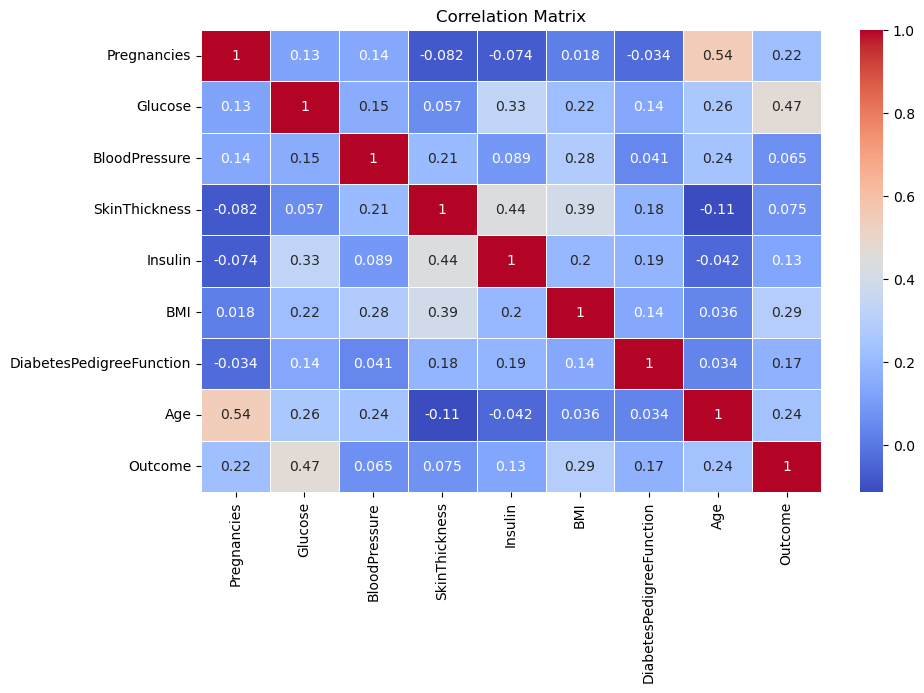

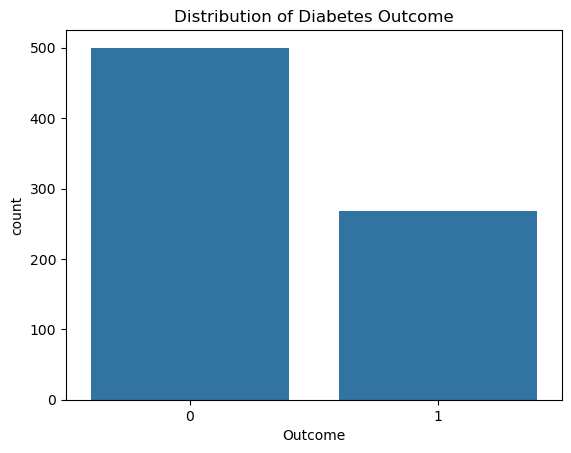

Logistic Regression - Accuracy: 0.7532, Precision: 0.6545, ROC-AUC: 0.7313


C:\Users\shrut\Downloads\anacprom\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


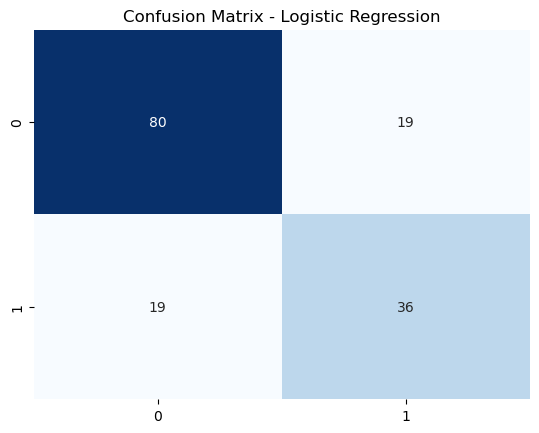

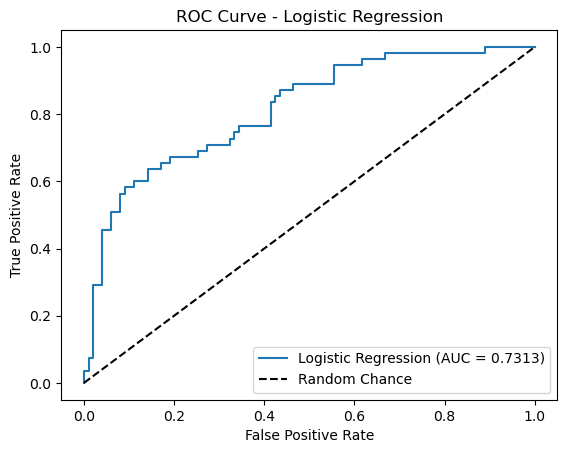

Random Forest - Accuracy: 0.7208, Precision: 0.6071, ROC-AUC: 0.6980


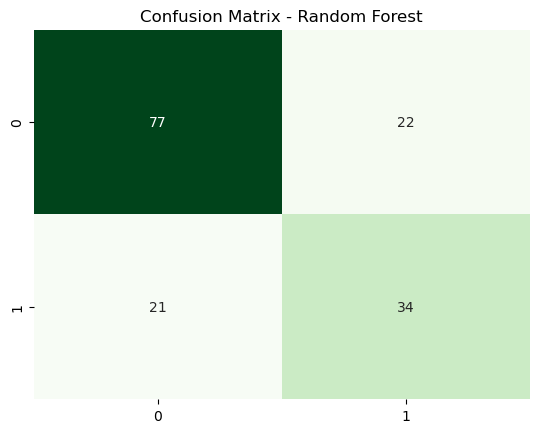

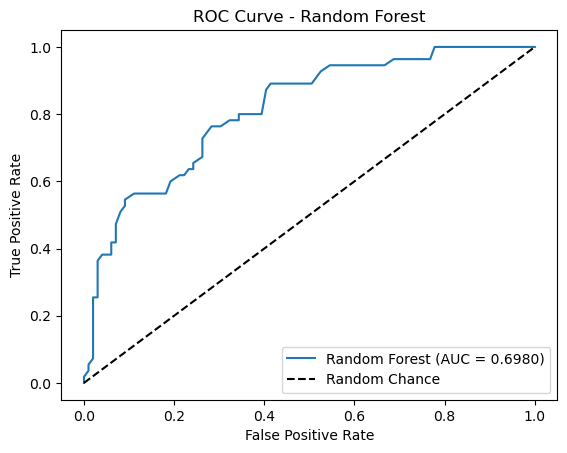

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

pima_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')

print(pima_data.head())

pima_data.dropna(inplace=True)

scaler = StandardScaler()
pima_data[['Age', 'Glucose', 'BMI']] = scaler.fit_transform(pima_data[['Age', 'Glucose', 'BMI']])

plt.figure(figsize=(10, 6))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

sns.countplot(x='Outcome', data=pima_data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

X = pima_data.drop('Outcome', axis=1)
y = pima_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.4f}, Precision: {precision_log_reg:.4f}, ROC-AUC: {roc_auc_log_reg:.4f}")

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, ROC-AUC: {roc_auc_rf:.4f}")

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.4f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()



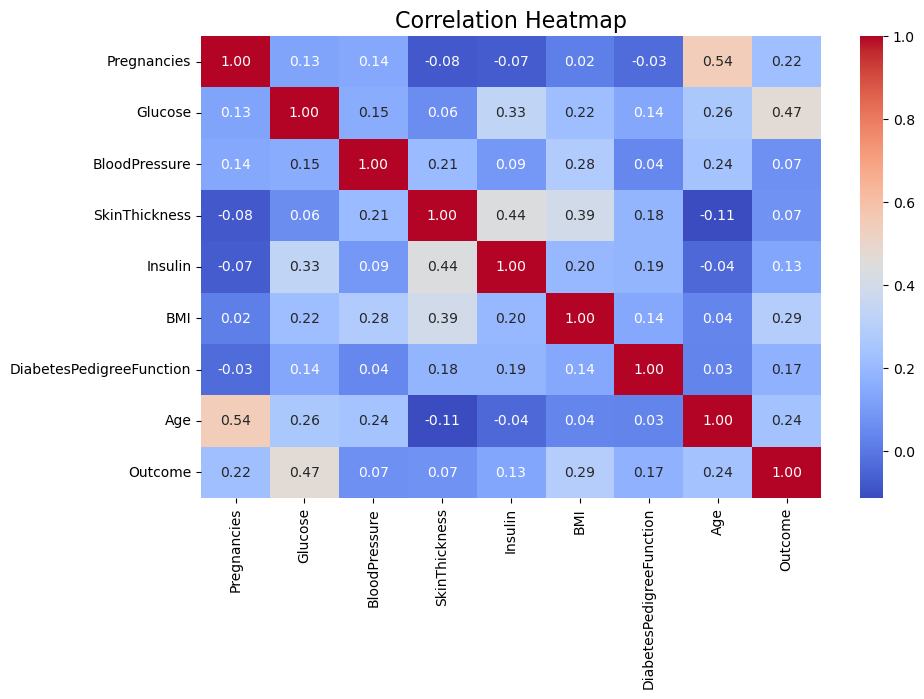

C:\Users\shrut\Downloads\anacprom\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 74.03%
Precision: 62.50%
ROC-AUC: 71.32%


Model: Random Forest
Accuracy: 75.32%
Precision: 63.86%
ROC-AUC: 73.19%




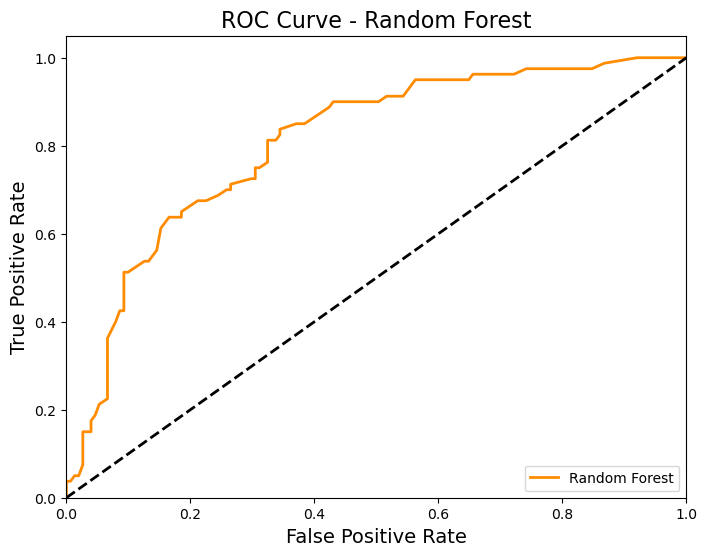

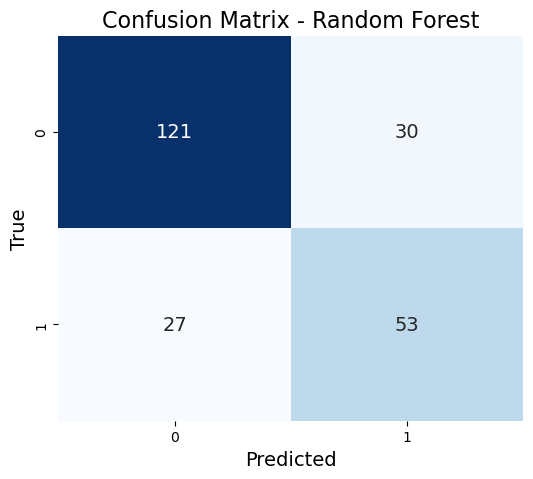

In [9]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

# Load the PIMA Indian Diabetes dataset
pima_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')

# Rename columns for ease of use
pima_data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                     'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Preprocessing the data
# Drop rows with missing values (if any)
pima_data.dropna(inplace=True)

# Normalize continuous variables (Glucose, BMI, Age)
scaler = StandardScaler()
pima_data[['Glucose', 'BMI', 'Age']] = scaler.fit_transform(pima_data[['Glucose', 'BMI', 'Age']])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Split data into features and target
X = pima_data.drop('Outcome', axis=1)
y = pima_data['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building
# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"ROC-AUC: {roc_auc * 100:.2f}%")
    print("\n")

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ROC Curve for Random Forest Model
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve - Random Forest', fontsize=16)
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.show()


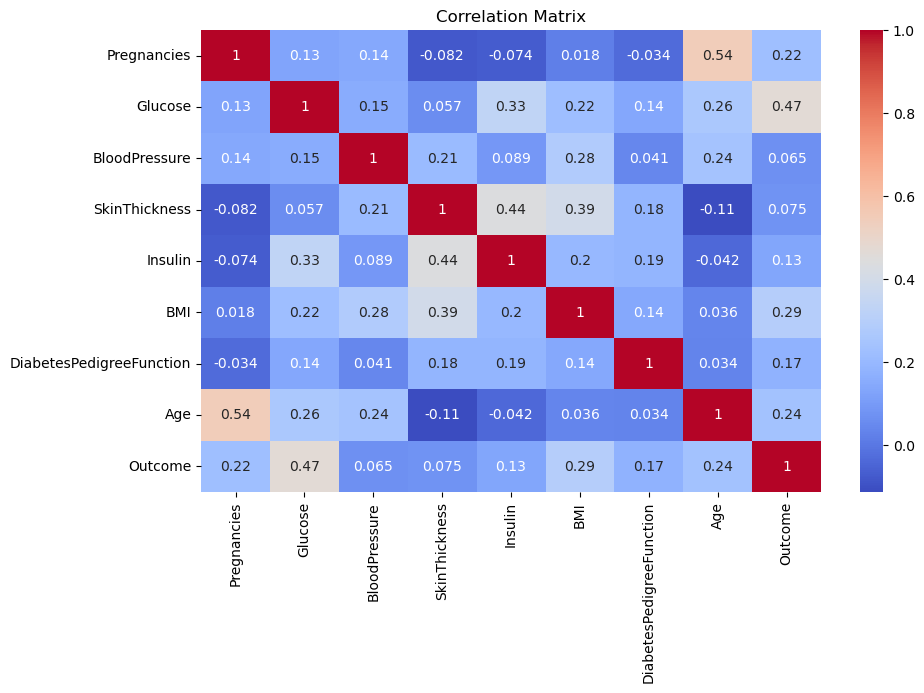

C:\Users\shrut\Downloads\anacprom\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7532467532467533
Logistic Regression Precision: 0.6545454545454545
Logistic Regression ROC-AUC: 0.7313131313131312
Random Forest Accuracy: 0.7207792207792207
Random Forest Precision: 0.6071428571428571
Random Forest ROC-AUC: 0.697979797979798


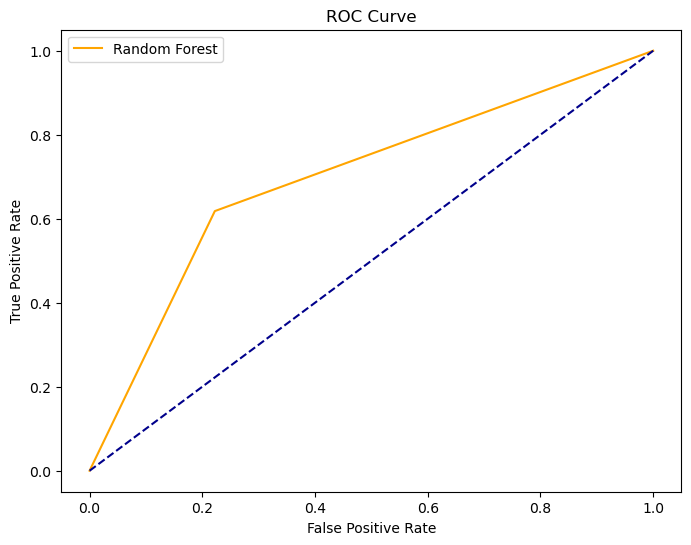

C:\Users\shrut\AppData\Local\Temp\ipykernel_13588\363265029.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


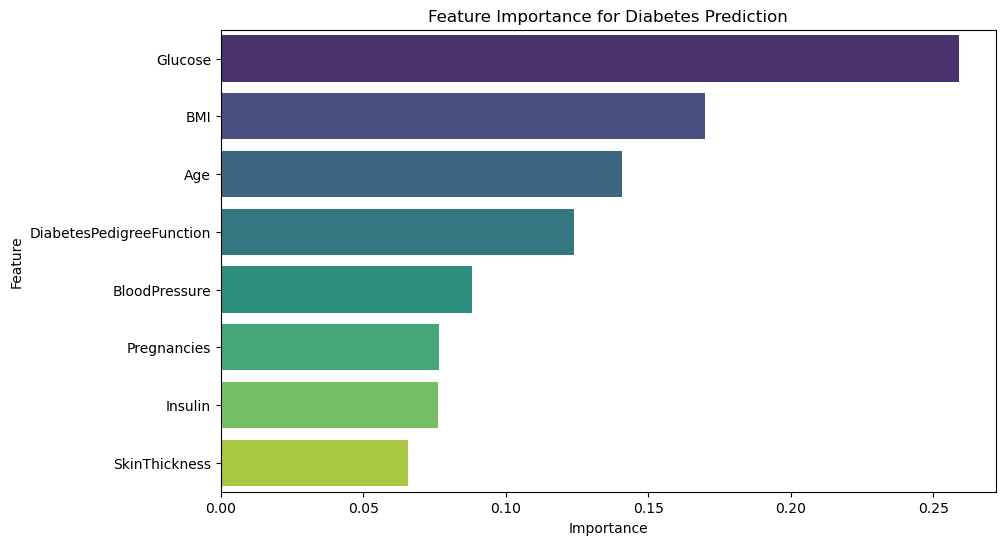

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

# Load the PIMA Indian Diabetes dataset
pima_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')
# Data Preprocessing
# Handling missing values - Remove rows with missing values
pima_data.dropna(inplace=True)

# Normalize continuous variables (Glucose, BMI, Age)
scaler = StandardScaler()
pima_data[['Glucose', 'BMI', 'Age']] = scaler.fit_transform(pima_data[['Glucose', 'BMI', 'Age']])

# Exploratory Data Analysis (EDA)
# Correlation matrix to see relationships between features
plt.figure(figsize=(10, 6))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Model Building: Logistic Regression & Random Forest

# Define feature variables (X) and target variable (y)
X = pima_data.drop(columns=['Outcome'])
y = pima_data['Outcome']

# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation
# Logistic Regression Metrics
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_log))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred_log))

# Random Forest Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

# Plot ROC Curve for Random Forest
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='Random Forest')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Insights & Recommendations (based on feature importance and risk patterns)
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Diabetes Prediction')
plt.show()

# If you have geographic data, plot geospatial heatmaps for high-risk areas
# (This is just a placeholder in case you want to extend this in the future)
# Use libraries like geopandas or folium for this task.


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


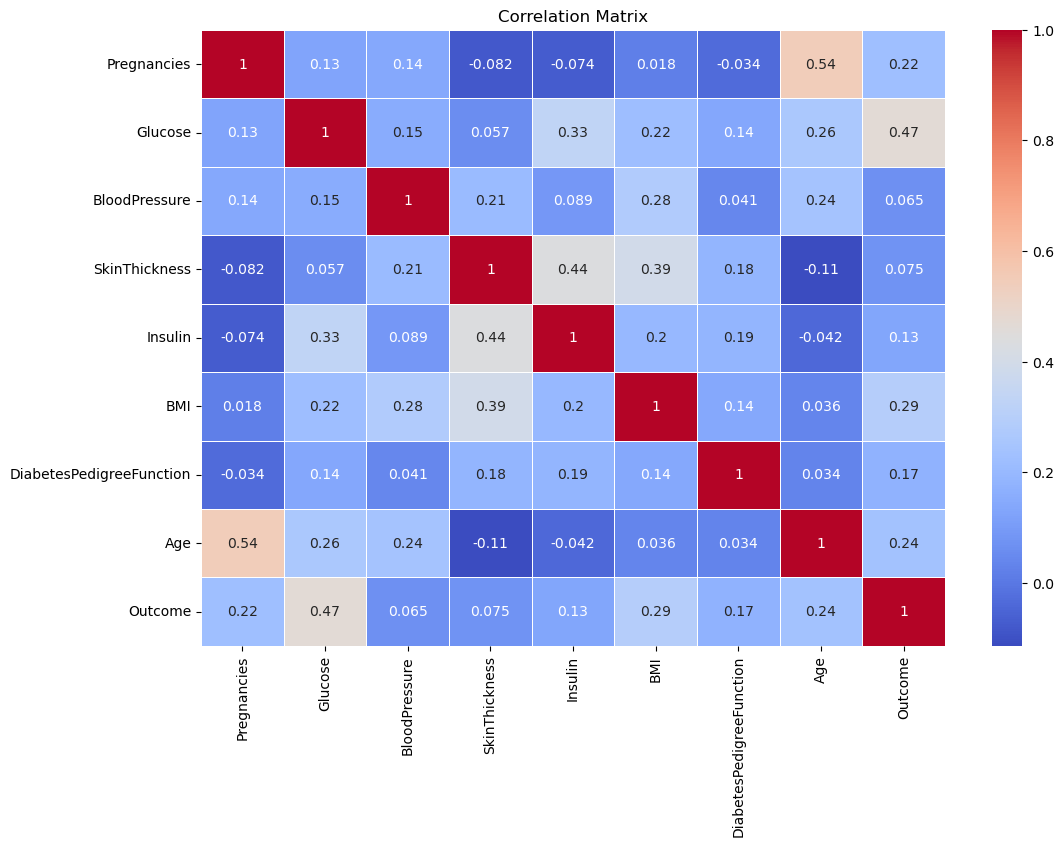

C:\Users\shrut\AppData\Local\Temp\ipykernel_13588\810935659.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=pima_data, palette='pastel')


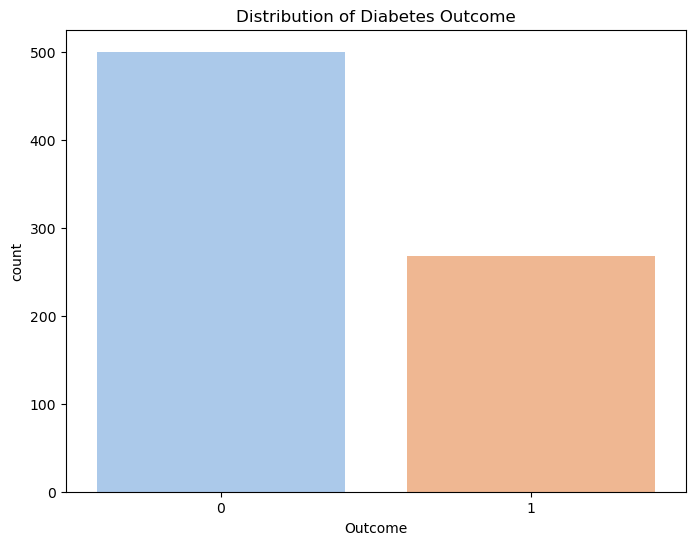

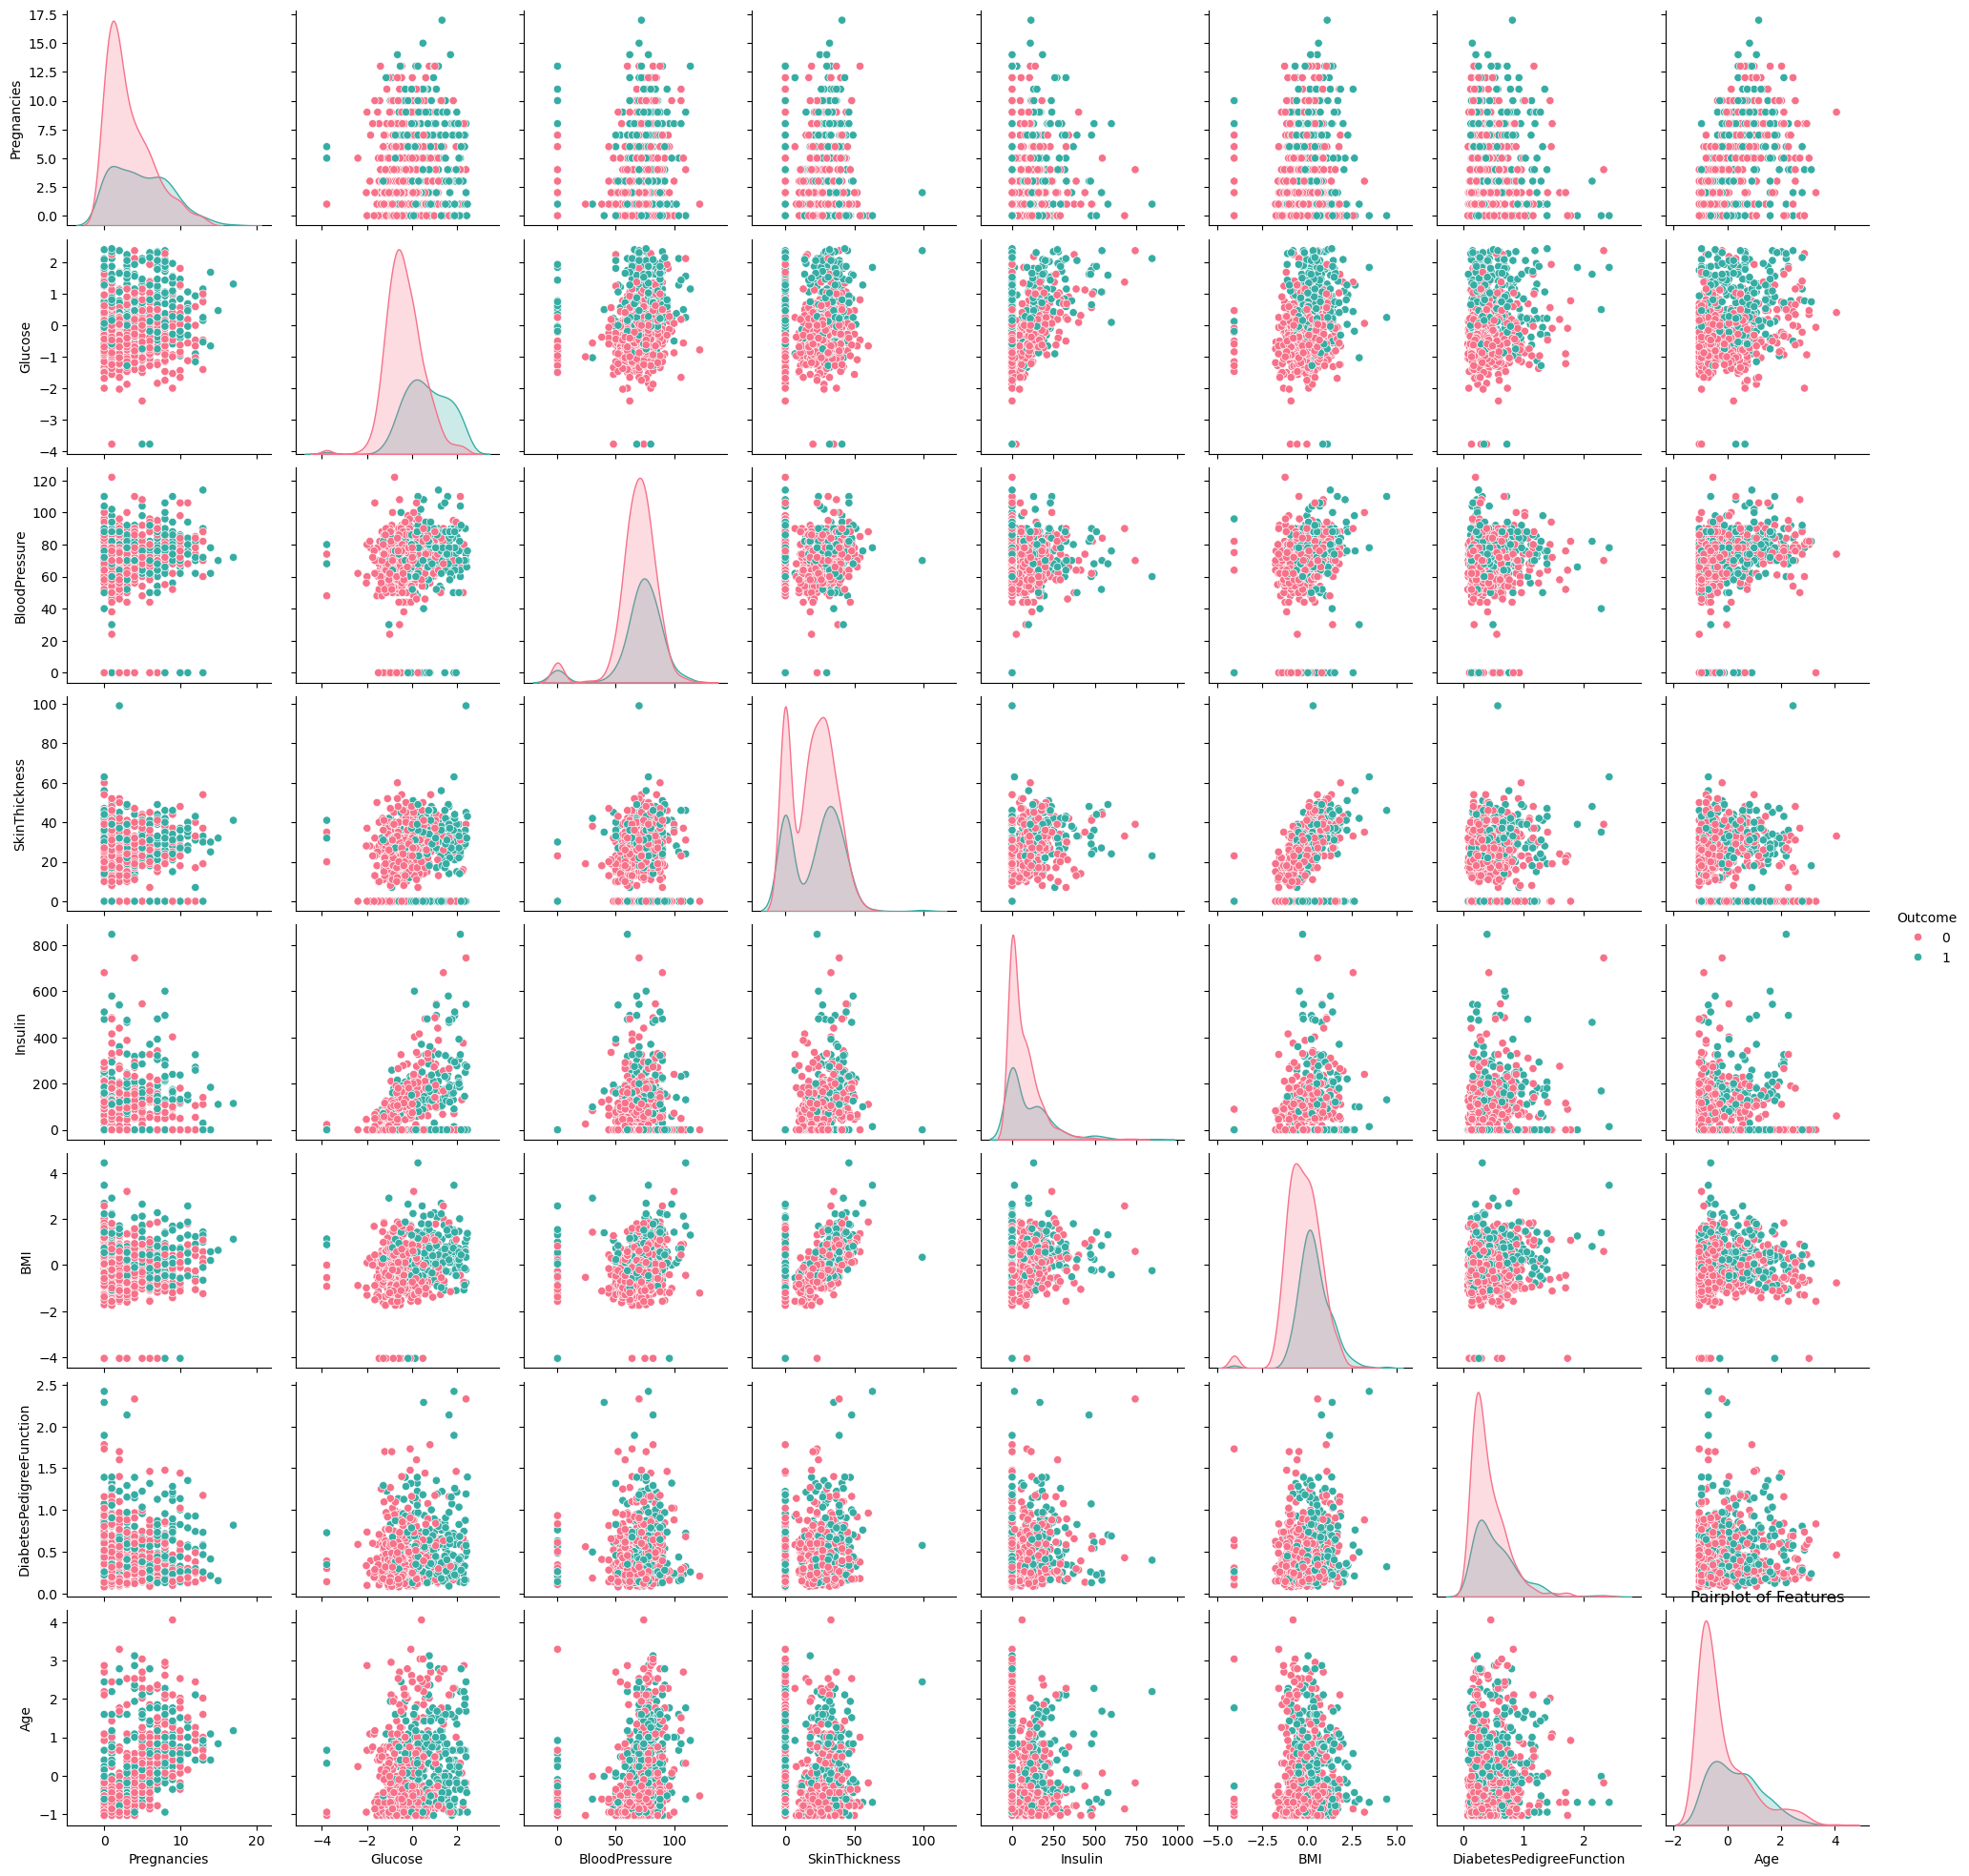

Logistic Regression - Accuracy: 0.7532, Precision: 0.6491, ROC-AUC: 0.7354


C:\Users\shrut\Downloads\anacprom\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


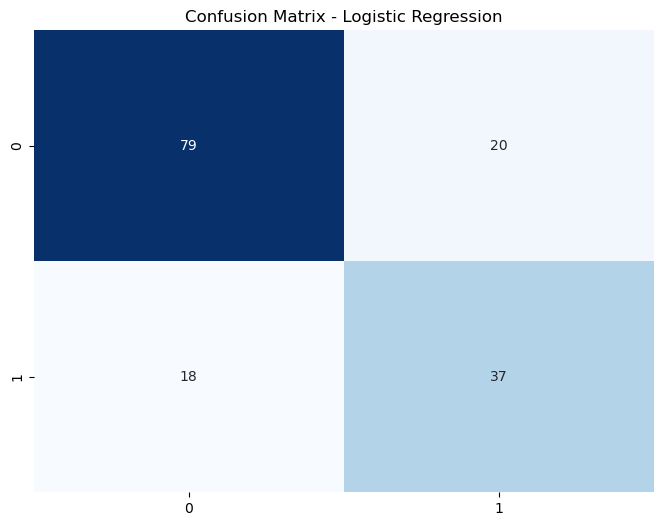

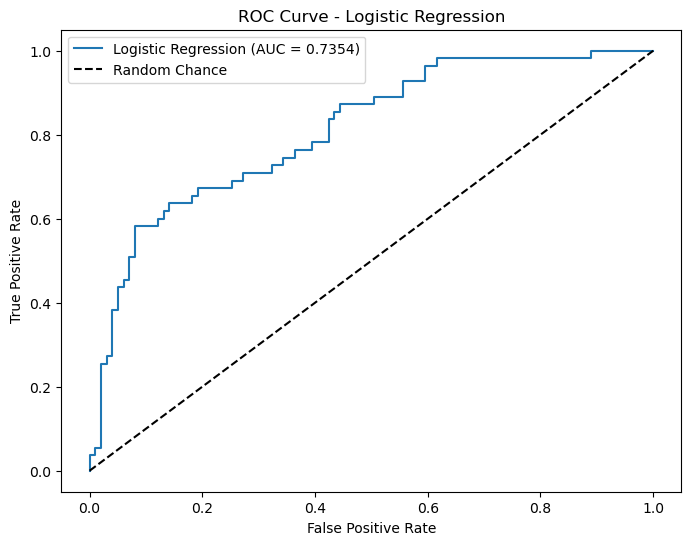

Random Forest - Accuracy: 0.7468, Precision: 0.6429, ROC-AUC: 0.7263


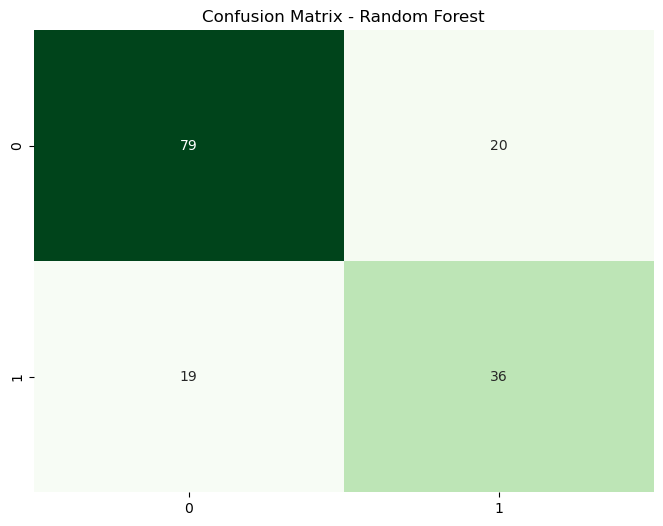

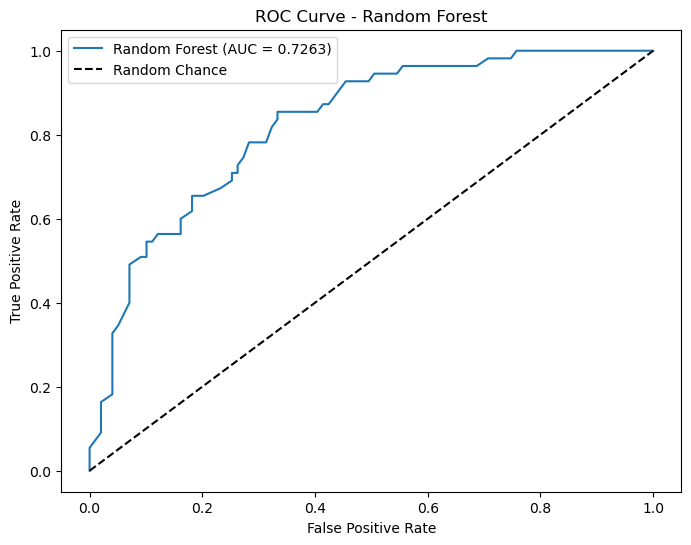

C:\Users\shrut\AppData\Local\Temp\ipykernel_13588\810935659.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


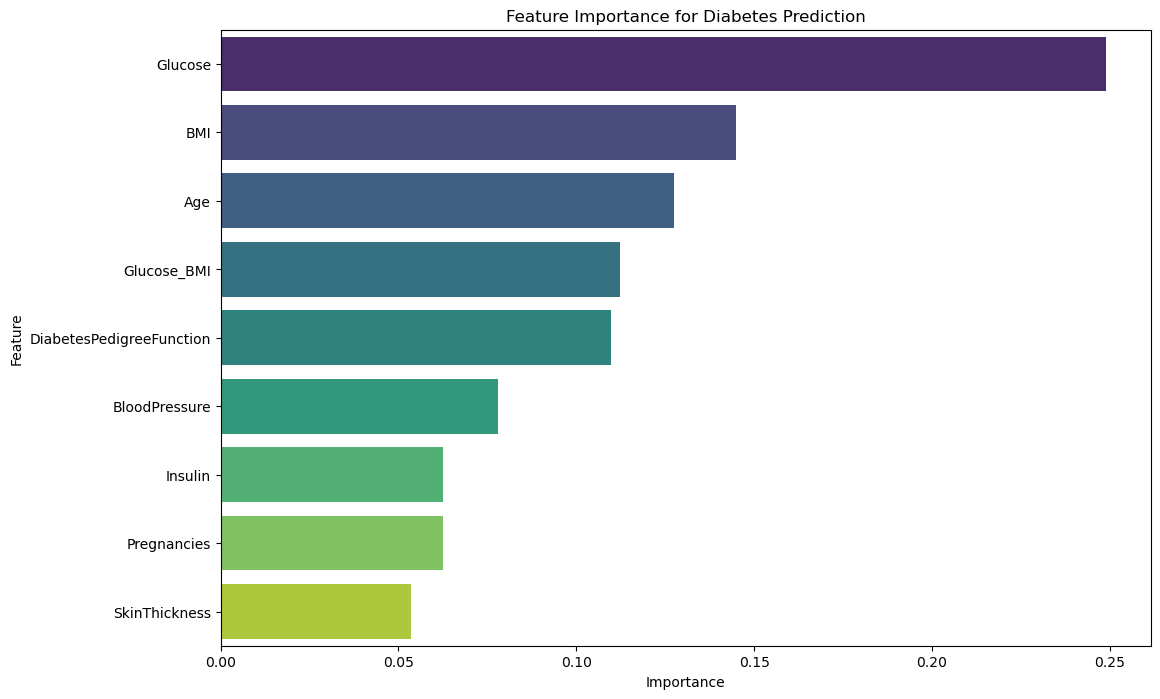

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, confusion_matrix

pima_data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')

print(pima_data.head())
pima_data.dropna(inplace=True)
scaler = StandardScaler()
pima_data[['Age', 'Glucose', 'BMI']] = scaler.fit_transform(pima_data[['Age', 'Glucose', 'BMI']])

plt.figure(figsize=(12, 8))
sns.heatmap(pima_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=pima_data, palette='pastel')
plt.title('Distribution of Diabetes Outcome')
plt.show()

sns.pairplot(pima_data, hue='Outcome', palette='husl', diag_kind='kde')
plt.title('Pairplot of Features')
plt.show()

pima_data['Glucose_BMI'] = pima_data['Glucose'] * pima_data['BMI']

X = pima_data.drop('Outcome', axis=1)
y = pima_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)

print(f"Logistic Regression - Accuracy: {accuracy_log_reg:.4f}, Precision: {precision_log_reg:.4f}, ROC-AUC: {roc_auc_log_reg:.4f}")

plt.figure(figsize=(8, 6))
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, ROC-AUC: {roc_auc_rf:.4f}")
plt.figure(figsize=(8, 6))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.4f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

feature_importance = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Diabetes Prediction')
plt.show()


Epoch 1/50


C:\Users\shrut\Downloads\anacprom\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4077 - loss: 0.7282 - val_accuracy: 0.4959 - val_loss: 0.6885
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5510 - loss: 0.6829 - val_accuracy: 0.7561 - val_loss: 0.6697
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5953 - loss: 0.6812 - val_accuracy: 0.6341 - val_loss: 0.6597
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6607 - loss: 0.6530 - val_accuracy: 0.6179 - val_loss: 0.6515
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6743 - loss: 0.6369 - val_accuracy: 0.6098 - val_loss: 0.6440
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6613 - loss: 0.6199 - val_accuracy: 0.6098 - val_loss: 0.6369
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 0.6272 - val_accuracy: 0.6179 - val_loss: 0.6293
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6655 - loss: 0.6182 - val_accuracy: 0.6260 - val_loss: 0.6223
Ep

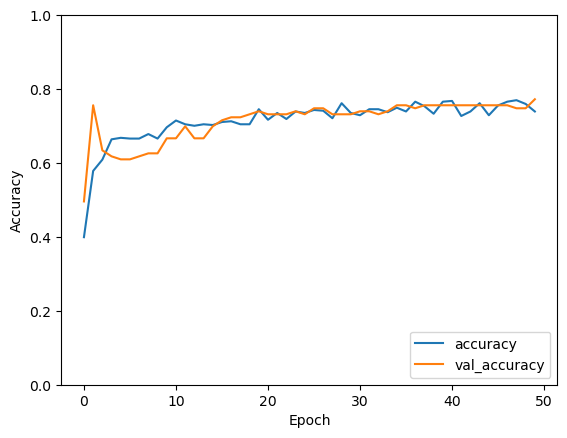

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')

# Replace zero values with NaN in columns that can't have zero values
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

# Fill NaN values with column means
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = Sequential([
    Dense(16, input_dim=8, activation='relu'),  # Input layer (8 features) and first hidden layer
    Dropout(0.2),                              # Dropout layer to prevent overfitting
    Dense(8, activation='relu'),               # Second hidden layer
    Dense(1, activation='sigmoid')             # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Print evaluation metrics
print("Accuracy: ", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))

# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()




In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset and preprocess




data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

# Feature and target separation, scaling, and train-test split
X = StandardScaler().fit_transform(data.drop('Outcome', axis=1))
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models and hyperparameters
models = {
    'Logistic Regression': (LogisticRegression(solver='liblinear'), {'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [None, 10]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': [100], 'learning_rate': [0.1]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5], 'weights': ['uniform', 'distance']})
}

# Grid search and evaluation
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Print accuracy
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


OSError: [Errno 22] Invalid argument

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load and preprocess the dataset
data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

# Feature and target separation
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models and hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
    },
    'SVM': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    }
}

# Function to perform GridSearchCV
def perform_grid_search(model, params, X, y):
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Dictionary to store results
results = {}

# Grid search for each model
for name, config in models.items():
    print(f"\nTraining {name}...")
    best_model, best_params, best_score = perform_grid_search(
        config['model'], config['params'], X_train, y_train)
    results[name] = {'model': best_model, 'params': best_params, 'f1_score': best_score}
    print(f"Best Params: {best_params}, Best F1-Score: {best_score:.4f}")

# Evaluate models
summary = []
for name, info in results.items():
    model = info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    summary.append({
        'Model': name,
        'F1-Score': round(report['1']['f1-score'], 4),
        'Accuracy': round(acc, 4)
    })
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Summary of results
summary_df = pd.DataFrame(summary).sort_values(by='Accuracy', ascending=False)
print("\nSummary of Model Performance:")
print(summary_df)



Training Logistic Regression...


OSError: [Errno 22] Invalid argument


Training Logistic Regression...
Best Params: {'C': 1, 'penalty': 'l1'}, Best F1-Score: 0.6631

Training SVM...
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}, Best F1-Score: 0.6324

Training Random Forest...
Best Params: {'max_depth': None, 'n_estimators': 100}, Best F1-Score: 0.6498

Training Gradient Boosting...
Best Params: {'learning_rate': 0.1, 'n_estimators': 100}, Best F1-Score: 0.6340

Training KNN...
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}, Best F1-Score: 0.6223


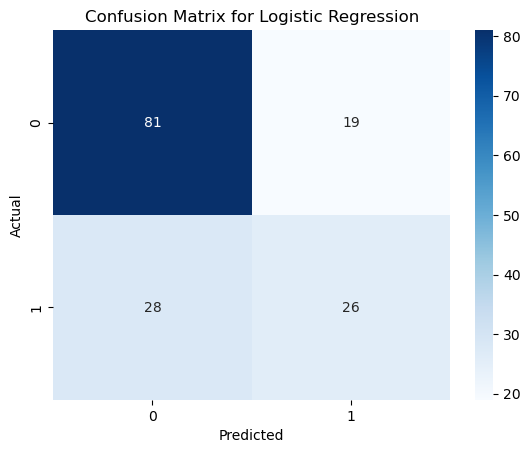

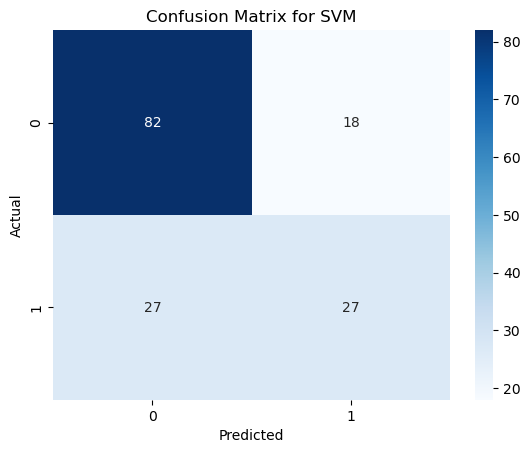

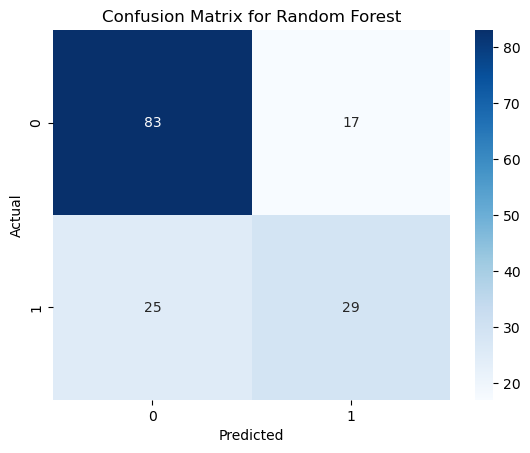

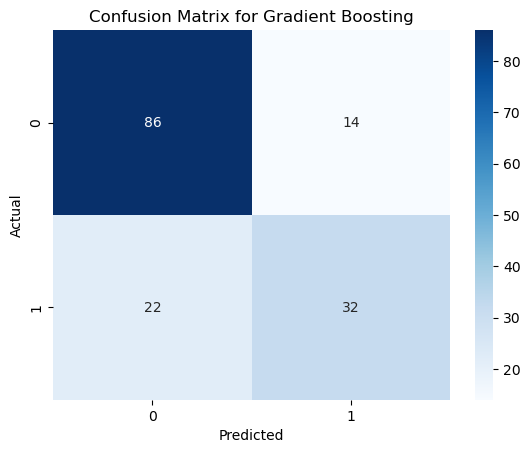

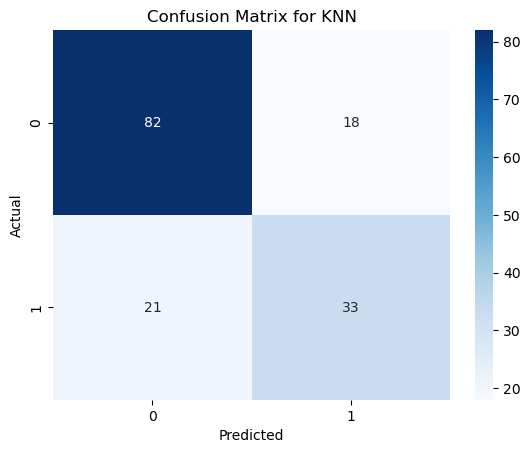


Summary of Model Performance:
                 Model  F1-Score  Accuracy
3    Gradient Boosting    0.6400    0.7662
4                  KNN    0.6286    0.7468
2        Random Forest    0.5800    0.7273
1                  SVM    0.5455    0.7078
0  Logistic Regression    0.5253    0.6948


In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load and preprocess the dataset
data = pd.read_csv(r'C:\Users\shrut\Downloads\diabetes.csv')
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)
data.fillna(data.mean(), inplace=True)

# Feature and target separation
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define models and hyperparameters
models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
    },
    'SVM': {
        'model': SVC(),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
    }
}

# Function to perform GridSearchCV
def perform_grid_search(model, params, X, y):
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=1)  # Changed n_jobs to 1 to prevent OSError
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Dictionary to store results
results = {}

# Grid search for each model
for name, config in models.items():
    print(f"\nTraining {name}...")
    try:
        best_model, best_params, best_score = perform_grid_search(
            config['model'], config['params'], X_train, y_train)
        results[name] = {'model': best_model, 'params': best_params, 'f1_score': best_score}
        print(f"Best Params: {best_params}, Best F1-Score: {best_score:.4f}")
    except Exception as e:
        print(f"An error occurred while training {name}: {e}")

# Evaluate models
summary = []
for name, info in results.items():
    model = info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    summary.append({
        'Model': name,
        'F1-Score': round(report['1']['f1-score'], 4),
        'Accuracy': round(acc, 4)
    })
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Summary of results
summary_df = pd.DataFrame(summary).sort_values(by='Accuracy', ascending=False)
print("\nSummary of Model Performance:")
print(summary_df)
